In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [7]:
df.shape

(100, 4)

In [8]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model


In [9]:
#Preprocessing stage is Complete
df=df.iloc[:,1:]
df
#Preprocessing stage is Complete
#removing the Unwwanted columns

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


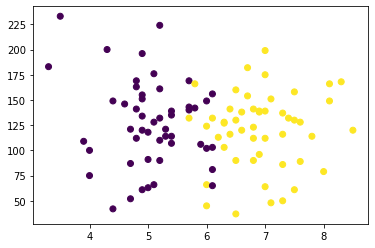

In [10]:
#EDA
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
#Extracting input and Output
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [12]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
#train test slpit
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


In [15]:
x_train

,cgpa,iq
92,5.2,110.0
10,6.0,45.0
47,5.2,161.0
68,4.0,75.0
38,6.5,160.0
...,...,...
39,4.6,146.0
7,5.0,63.0
79,6.5,90.0
97,6.7,182.0


In [16]:
x_test

,cgpa,iq
46,5.3,114.0
91,7.5,158.0
37,8.1,149.0
35,6.8,90.0
93,6.8,112.0
80,4.9,196.0
6,5.7,143.0
60,6.9,139.0
17,3.3,183.0
25,5.0,91.0


In [17]:
y_train

92    0
10    1
47    0
68    0
38    1
     ..
39    0
7     0
79    1
97    1
0     1
Name: placement, Length: 90, dtype: int64

In [18]:
y_test

46    0
91    1
37    1
35    1
93    1
80    0
6     0
60    1
17    0
25    0
Name: placement, dtype: int64

In [19]:
#now scaling the values
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
x_train=scaler.fit_transform(x_train)

In [22]:
x_train

array([[-0.70949292, -0.30072173],
       [ 0.0120253 , -1.9251189 ],
       [-0.70949292,  0.97380528],
       [-1.79177027, -1.17539713],
       [ 0.4629742 ,  0.94881455],
       [ 1.18449243,  0.37402786],
       [-0.25854403,  0.24907423],
       [ 0.91392309, -1.45029511],
       [-0.61930315, -0.02582375],
       [-0.25854403,  0.44900004],
       [-1.43101115,  0.67391657],
       [ 0.91392309,  1.92345285],
       [-0.52911337, -0.37569391],
       [ 1.45506176, -0.82552697],
       [-0.52911337, -0.20075883],
       [ 1.36487198, -1.52526729],
       [ 0.10221508, -1.42530439],
       [ 0.0120253 , -1.40031366],
       [ 1.18449243, -1.80016527],
       [ 0.28259464,  0.1241206 ],
       [-0.16835425,  1.0987589 ],
       [-1.07025204,  0.47399076],
       [ 0.55316398,  0.39901859],
       [ 0.37278442, -0.15077738],
       [ 0.10221508,  0.84885165],
       [ 0.91392309, -0.25074028],
       [ 0.4629742 ,  0.19909278],
       [ 0.0120253 , -0.50064754],
       [-1.07025204,

In [23]:
x_test=scaler.transform(x_test)

In [24]:
x_test

array([[-0.61930315, -0.20075883],
       [ 1.36487198,  0.8988331 ],
       [ 1.90601065,  0.67391657],
       [ 0.73354353, -0.80053624],
       [ 0.73354353, -0.25074028],
       [-0.98006226,  1.84848067],
       [-0.25854403,  0.52397221],
       [ 0.82373331,  0.42400931],
       [-2.42309872,  1.52360124],
       [-0.88987248, -0.77554552]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf=LogisticRegression()

In [27]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [33]:
#consists of hidden inputs
y_pred=clf.predict(x_test)

In [34]:
y_test

46    0
91    1
37    1
35    1
93    1
80    0
6     0
60    1
17    0
25    0
Name: placement, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score

In [37]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [38]:
#now to find the accuracy between Y-pred and y_test
accuracy_score(y_pred,y_test)


1.0

How to plot Decision Boundary

In [40]:
#means what machine learning saw a pattern in the model

In [47]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

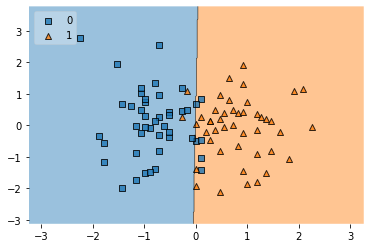

In [48]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)